<a href="https://colab.research.google.com/github/RaulOAlves/Wind_Turbine_Scada/blob/main/Wind_Turbine_Scada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wind Turbine Scada

Em turbinas eólicas, os sistemas Scada medem e salvam dados como velocidade do vento, direção do vento, energia gerada, etc. por intervalos de 10 minutos. Este arquivo foi retirado do sistema de scada de uma turbina eólica que está funcionando e gerando energia na Turquia. 

Os dados no arquivo são:

* Date/Time (para 10 min de intervalo)
* LV ActivePower (kW): 
 * A energia gerada pela turbina para aquele momento .
 * *The power generated by the turbine for that moment.*
* Wind Speed (m/s): 
  * A velocidade do vento na altura do cubo da turbina (a velocidade do vento que a turbina usa para geração de eletricidade).
 * *The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation).* 
* Theoretical_Power_Curve (KWh):
 * Os valores teóricos de potência que a turbina gera com a velocidade do vento que é dada pelo fabricante da turbina.
 * *The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer.*
* Wind Direction (°): 
 * A direção do vento na altura do cubo da turbina (as turbinas eólicas giram para essa direção automaticamente).
 * *The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly).*

In [1]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [13]:
# Lendo os arquivos

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estudos_gerais/Wind_Turbine_Scada/T1.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


<Axes: xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

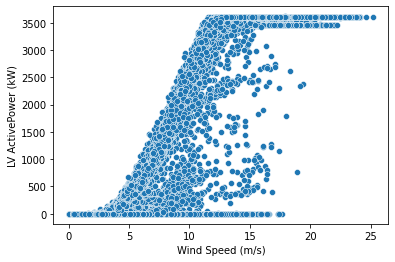

In [15]:
# Plotando os dados de potência gerada pela velocidade do vento

sns.scatterplot(data=df, x='Wind Speed (m/s)', y='LV ActivePower (kW)')

<Axes: xlabel='Wind Speed (m/s)', ylabel='Theoretical_Power_Curve (KWh)'>

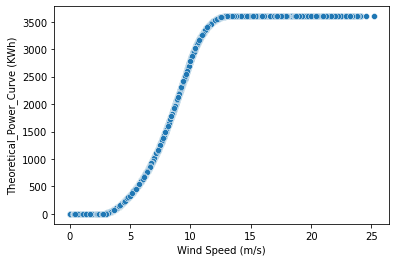

In [16]:
# Plotando os dados de potência teórica gerada pela velocidade do vento

sns.scatterplot(data=df, x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)')

In [19]:
pot_real = df['LV ActivePower (kW)'].tolist()
pot_teorica = df['Theoretical_Power_Curve (KWh)'].tolist()
pot_max = []
pot_min = []
limite_dentro = []

for potencia in pot_teorica:
  pot_max.append(potencia*1.05)
  pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
  if potencia<=pot_max[p] and potencia>=pot_min[p]:
    limite_dentro.append('Dentro')
  elif potencia == 0:
    limite_dentro.append('Zero')
  else:
    limite_dentro.append('Fora')

print(limite_dentro.count('Dentro')/len(limite_dentro))

0.37286760340391845


In [20]:
df['DentroLimite'] = limite_dentro
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,Fora
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,Dentro


<Axes: xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

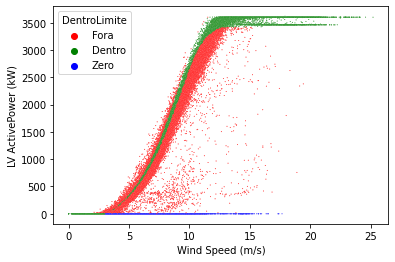

In [24]:
cores = {'Dentro':'green', 'Fora': 'red', 'Zero':'blue'}
sns.scatterplot(data=df, x='Wind Speed (m/s)', y='LV ActivePower (kW)', hue='DentroLimite', s=1, palette=cores)